In [1]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.7 MB/s eta 0:00:00


In [2]:
import osmnx as ox

In [ ]:
G = ox.graph.graph_from_place(places, truncate_by_edge=True)

# save to disk as GeoPackage file then plot
ox.io.save_graph_geopackage(G)
fig, ax = ox.plot.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

In [4]:
!pip install osmnx geopandas contextily matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 76.7 MB/s eta 0:00:00


country (or place) boundary with geocode_to_gdf

In [5]:
import osmnx as ox
import matplotlib.pyplot as plt

ox.config(use_cache=True, log_console=False)

# get the place polygon as a GeoDataFrame
gdf_place = ox.geocode_to_gdf("Kenya")   # change "Kenya" to any place string
print(gdf_place.columns)

ax = gdf_place.plot(figsize=(8,8), linewidth=1, edgecolor="k", facecolor="none")
ax.set_title("Boundary: Kenya")
ax.set_axis_off()
plt.show()


AttributeError: module 'osmnx' has no attribute 'config'

Get administrative boundaries (all levels) inside a country — then filter by admin_level

In [8]:
import osmnx as ox
import matplotlib.pyplot as plt

ox.setting(use_cache=True, log_console=False)

# get country polygon
country = ox.geocode_to_gdf("Kenya").iloc[0].geometry

# query all 'boundary=administrative' geometries inside that polygon
tags = {"boundary": "administrative"}
gdf_admin = ox.geometries_from_polygon(country, tags)

# admin_level is stored as strings like '2','4','6' etc. Inspect unique values:
print("admin levels:", sorted(gdf_admin.get("admin_level", pd.Series()).unique()))

# example: keep only country-level (admin_level == '2')
gdf_countrylevel = gdf_admin[gdf_admin["admin_level"] == "2"]

ax = gdf_countrylevel.plot(figsize=(8,8), linewidth=1.0, edgecolor="red", facecolor="none")
# optionally plot all lower-level boundaries too:
gdf_lower = gdf_admin[gdf_admin["admin_level"].isin(["4","6"])]  # example
gdf_lower.plot(ax=ax, linewidth=0.7, edgecolor="blue", facecolor="none")
ax.set_title("Administrative boundaries (filtered by admin_level)")
ax.set_axis_off()
plt.show()


AttributeError: module 'osmnx' has no attribute 'geometries_from_polygon'

Plot行政区 (e.g., Nairobi county boundaries) and add a basemap

In [9]:
import osmnx as ox
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd

ox.config(use_cache=True, log_console=False)

# get the specific place polygon
gdf_place = ox.geocode_to_gdf("Nairobi County, Kenya")
poly = gdf_place.loc[0, "geometry"]

# fetch administrative boundaries within that polygon
tags = {"boundary": "administrative"}
gdf_admin = ox.geometries_from_polygon(poly, tags)

# choose a level that corresponds to subcounty/ward in your area (inspect admin_level values)
gdf_level = gdf_admin[gdf_admin["admin_level"] == "6"]  # example — change as needed

# reproject to web mercator for contextily basemap
gdf_level = gdf_level.to_crs(epsg=3857)
ax = gdf_level.plot(figsize=(10,10), linewidth=1, edgecolor="orange", facecolor="none")
ctx.add_basemap(ax)            # adds a slippy basemap underneath
ax.set_axis_off()
plt.show()


AttributeError: module 'osmnx' has no attribute 'config'

In [20]:
# help(ox.settings)

/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 291 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


admin levels: ['2', '4', '5', '6', '3', '9', '10', '8', '7', '12', '1']


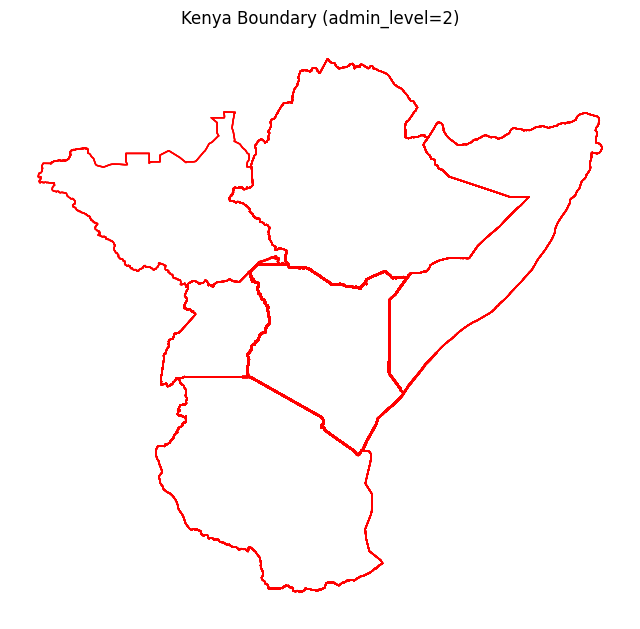

In [23]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd

ox.settings.cache_only_mode=not True#, log_console=False)

# get Kenya polygon
kenya = ox.geocode_to_gdf("Kenya").iloc[0].geometry

# get all administrative boundaries within Kenya
tags = {"boundary": "administrative"}
gdf_admin = ox.features_from_polygon(kenya, tags)

print("admin levels:", pd.Series(gdf_admin["admin_level"].unique()).dropna().tolist())

# plot country boundary (admin_level=2)
ax = gdf_admin[gdf_admin["admin_level"] == "2"].plot(
    figsize=(8, 8), edgecolor="red", facecolor="none"
)
ax.set_title("Kenya Boundary (admin_level=2)")
ax.set_axis_off()
plt.show()


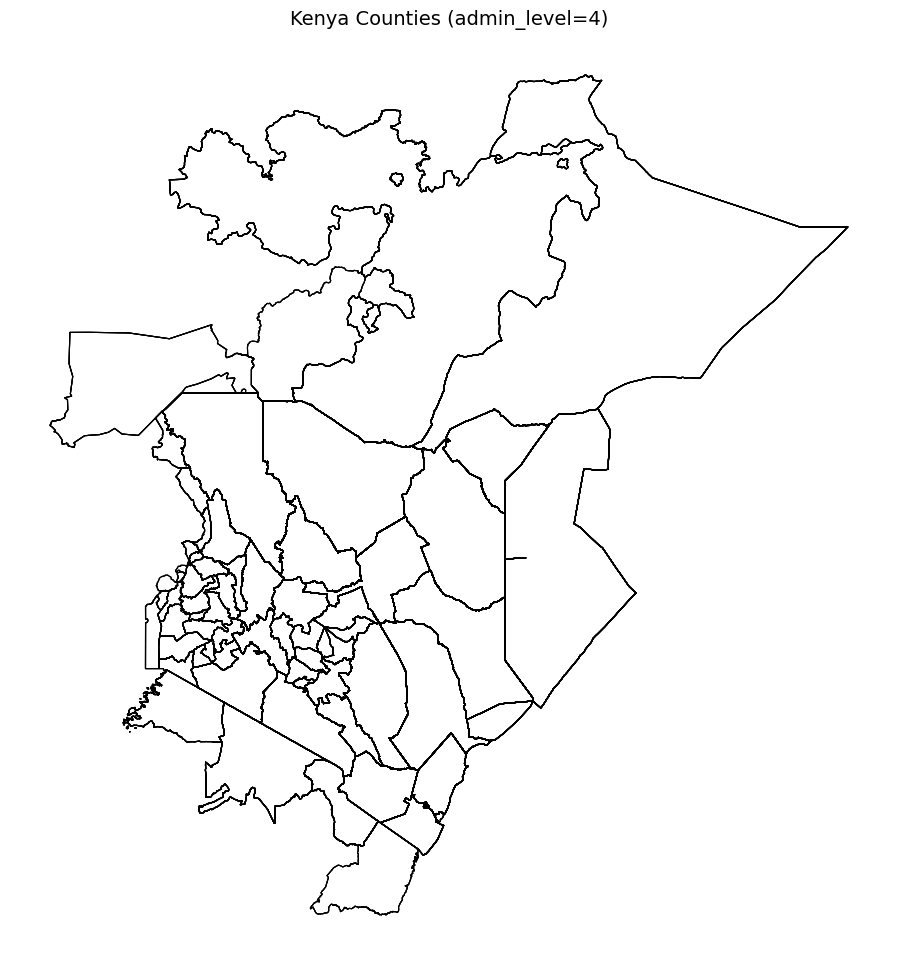

In [24]:
import matplotlib.pyplot as plt

# counties = admin_level 4
gdf_counties = gdf_admin[gdf_admin["admin_level"] == "4"]

ax = gdf_counties.plot(
    figsize=(12, 12),
    edgecolor="black",
    facecolor="none",
    linewidth=0.8
)
ax.set_title("Kenya Counties (admin_level=4)", fontsize=14)
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 291 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


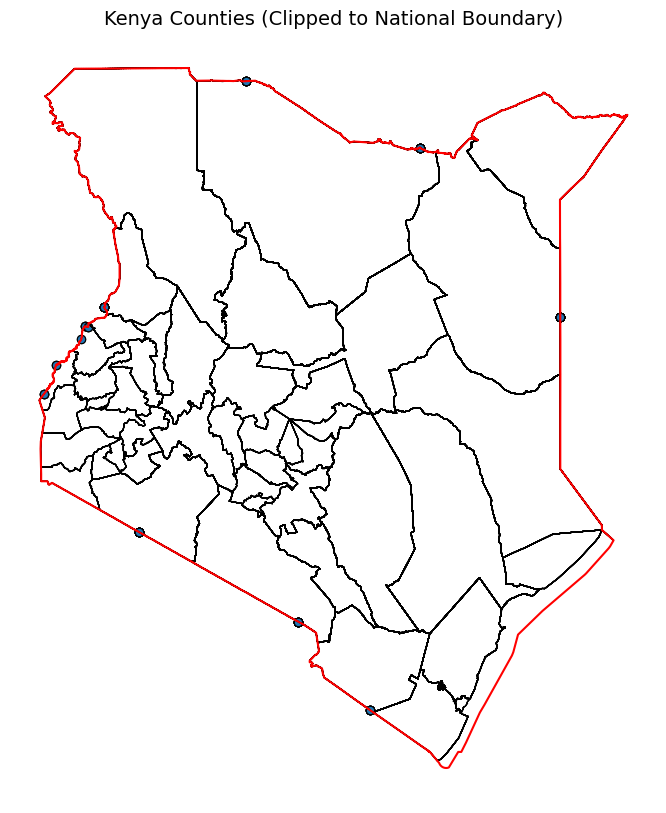

In [25]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# get Kenya polygon
gdf_country = ox.geocode_to_gdf("Kenya")
kenya_poly = gdf_country.iloc[0].geometry

# get admin boundaries overlapping Kenya
tags = {"boundary": "administrative"}
gdf_admin = ox.features_from_polygon(kenya_poly, tags)

# keep only counties (admin_level=4)
gdf_counties = gdf_admin[gdf_admin["admin_level"] == "4"].copy()

# clip them strictly to Kenya polygon
gdf_counties = gpd.clip(gdf_counties, kenya_poly)

# plot
ax = gdf_counties.plot(
    figsize=(10, 10),
    edgecolor="black",
    facecolor="none",
    linewidth=0.8
)
gdf_country.boundary.plot(ax=ax, color="red", linewidth=1.5)  # Kenya outline
ax.set_title("Kenya Counties (Clipped to National Boundary)", fontsize=14)
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 291 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4848 (\N{ETHIOPIC SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4705 (\N{ETHIOPIC SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4709 (\N{ETHIOPIC SYLLABLE BE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarnin

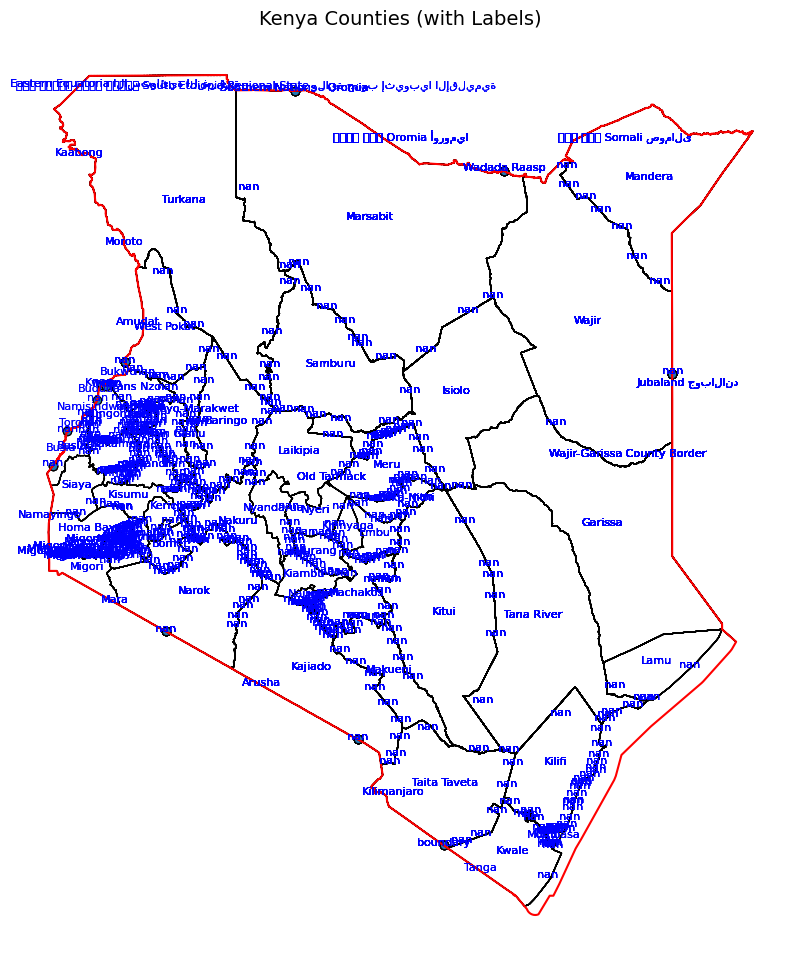

In [27]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# get Kenya polygon
gdf_country = ox.geocode_to_gdf("Kenya")
kenya_poly = gdf_country.iloc[0].geometry

# get admin boundaries overlapping Kenya
tags = {"boundary": "administrative"}
gdf_admin = ox.features_from_polygon(kenya_poly, tags)

# keep only counties (admin_level=4)
gdf_counties = gdf_admin[gdf_admin["admin_level"] == "4"].copy()

# clip strictly to Kenya boundary
gdf_counties = gpd.clip(gdf_counties, kenya_poly)

# plot counties
fig, ax = plt.subplots(figsize=(12, 12))
gdf_counties.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)
gdf_country.boundary.plot(ax=ax, color="red", linewidth=1.5)

# add labels at centroids
for idx, row in gdf_counties.iterrows():
    if row.geometry.is_valid:
        x, y = row.geometry.centroid.coords[0]
        ax.text(x, y, row.get("name", ""), fontsize=8, ha="center", color="blue")

ax.set_title("Kenya Counties (with Labels)", fontsize=14)
ax.set_axis_off()
plt.show()


In [29]:
# prefer English name if available
gdf_counties["label"] = (
    gdf_counties["name:en"]
    .fillna(gdf_counties["name"])
    .fillna(gdf_counties["official_name"])
)

# keep only counties with ISO3166-2 code starting with "KE-"
gdf_counties = gdf_counties[gdf_counties["ISO3166-2"].str.startswith("KE-")]

# plot counties
fig, ax = plt.subplots(figsize=(12, 12))
gdf_counties.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)
gdf_country.boundary.plot(ax=ax, color="red", linewidth=1.5)

# add labels at centroids
for idx, row in gdf_counties.iterrows():
    if row.geometry.is_valid:
        x, y = row.geometry.centroid.coords[0]
        ax.text(x, y, row.get("name", ""), fontsize=8, ha="center", color="blue")

ax.set_title("Kenya Counties (with Labels)", fontsize=14)
ax.set_axis_off()
plt.show()

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [31]:
!pip install adjustText

/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 291 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


283 [ 0.04514774 -0.79327777]
284 [-0.6327712   0.93506154]
285 [-0.13664169 -0.92370601]
286 [ 0.07817266 -0.3683653 ]
287 [-0.27316693 -0.73509029]
111 [-0.44282916 -0.21067835]
112 [-0.51331933  0.63486661]
113 [0.21615421 0.971025  ]
114 [ 0.12754666 -0.7730754 ]
115 [-0.78484557  0.33061991]
116 [ 0.65243931 -0.20816752]
100 [0.82649452 0.24289943]
101 [0.64827244 0.80202936]
102 [-0.3393571   0.55221497]
103 [-0.74900542 -0.01224381]
104 [-0.16373651  0.43128044]
67 [0.08403783 0.8113081 ]
68 [ 0.29038292 -0.72407624]
69 [-0.50857403 -0.39895839]
70 [-0.22469074  0.56481901]
322 [-0.3459426  -0.31460364]
323 [-0.96250303  0.35250486]
324 [ 0.05240396 -0.20679765]
325 [ 0.21509551 -0.1849222 ]
276 [0.85896591 0.73497604]
277 [0.07720532 0.71941938]
293 [-0.18836509 -0.35632933]
294 [-0.28031374 -0.59603605]
295 [-0.69334226  0.32579821]
296 [-0.58342925 -0.50851045]
297 [-0.78728674 -0.96271683]
298 [0.25641879 0.30955249]
87 [0.74341114 0.9890362 ]
88 [-0.51787028  0.79810487]
89

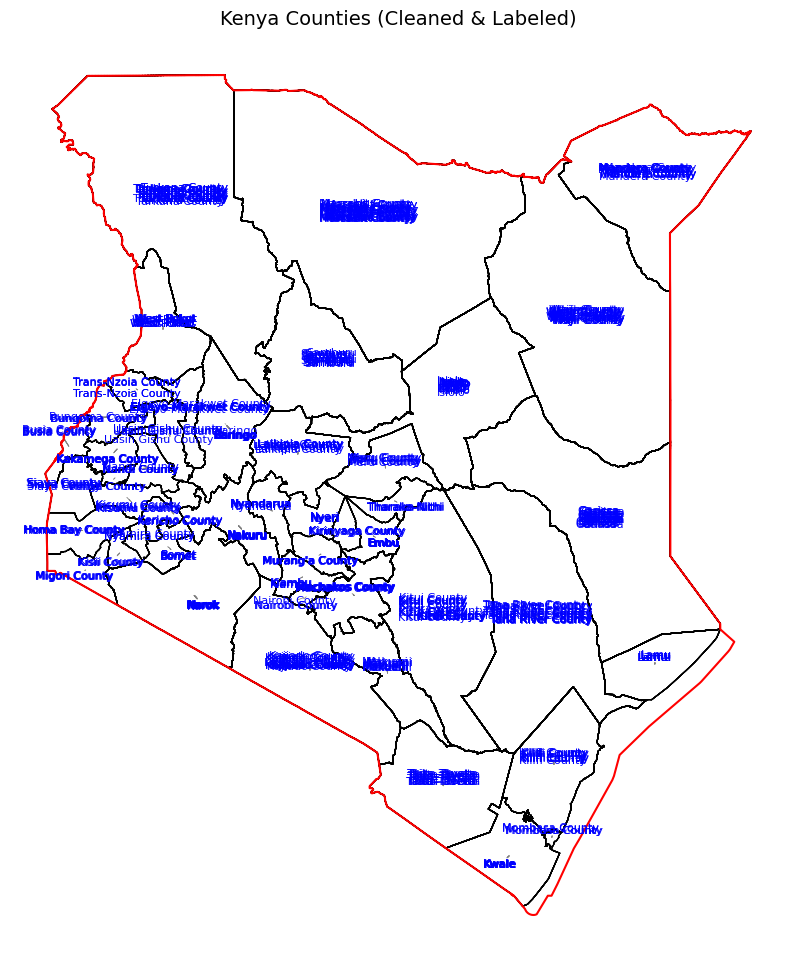

In [32]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# get Kenya polygon
gdf_country = ox.geocode_to_gdf("Kenya")
kenya_poly = gdf_country.iloc[0].geometry

# fetch counties
tags = {"boundary": "administrative"}
gdf_admin = ox.features_from_polygon(kenya_poly, tags)
gdf_counties = gdf_admin[gdf_admin["admin_level"] == "4"].copy()
gdf_counties = gpd.clip(gdf_counties, kenya_poly)

# filter only Kenyan counties (ISO3166-2 starts with KE-)
if "ISO3166-2" in gdf_counties.columns:
    gdf_counties = gdf_counties[gdf_counties["ISO3166-2"].str.startswith("KE-", na=False)]

# build label column
if "name:en" in gdf_counties.columns:
    gdf_counties["label"] = (
        gdf_counties["name:en"]
        .fillna(gdf_counties["name"])
        .fillna(gdf_counties["official_name"])
    )
else:
    gdf_counties["label"] = gdf_counties["name"]

# plot
fig, ax = plt.subplots(figsize=(12, 12))
gdf_counties.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)
gdf_country.boundary.plot(ax=ax, color="red", linewidth=1.5)

# add labels with adjustText
texts = []
for idx, row in gdf_counties.iterrows():
    if row.geometry.is_valid and row["label"] is not None:
        x, y = row.geometry.centroid.coords[0]
        texts.append(ax.text(x, y, row["label"], fontsize=8, ha="center", color="blue"))

adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))

ax.set_title("Kenya Counties (Cleaned & Labeled)", fontsize=14)
ax.set_axis_off()
plt.show()


In [33]:
texts

[Text(38.402524282682336, -3.3009161686709945, 'Taita–Taveta'),
 Text(38.39824838499434, -3.3890640108166727, 'Taita–Taveta'),
 Text(38.4012130120023, -3.3289914841746717, 'Taita–Taveta'),
 Text(38.452279348158434, -3.313092597400549, 'Taita–Taveta'),
 Text(38.451112609223436, -3.389155676159924, 'Taita–Taveta'),
 Text(38.40477016158786, -3.388786234911733, 'Taita–Taveta'),
 Text(38.40069657969637, -3.298663658848587, 'Taita–Taveta'),
 Text(38.38651313709842, -3.3883704962478545, 'Taita–Taveta'),
 Text(38.44992829512868, -3.329874101326485, 'Taita–Taveta'),
 Text(38.400612456152025, -3.3555371949004127, 'Taita–Taveta'),
 Text(38.40491969902496, -3.3151056656570637, 'Taita–Taveta'),
 Text(38.404185663469335, -3.3285064857368343, 'Taita–Taveta'),
 Text(38.4303319496561, -3.300545236369436, 'Taita–Taveta'),
 Text(38.43236748798833, -3.373268614173439, 'Taita–Taveta'),
 Text(39.058460648069236, -4.322946179098464, 'Kwale'),
 Text(39.06774816585352, -4.329408018312772, 'Kwale'),
 Text(39.05

283 [ 0.3800783  -0.75461689]
284 [-0.26451511  0.23298537]
285 [0.05197726 0.24663819]
286 [-0.014097    0.17806862]
287 [ 0.45334817 -0.09670355]
111 [ 0.77119749 -0.50571134]
112 [-0.99485168  0.9613176 ]
113 [0.4863823  0.41176098]
114 [-0.48960206 -0.30856744]
115 [ 0.51691315 -0.29599987]
116 [-0.69074847 -0.18039315]
100 [-0.41035226 -0.1936666 ]
101 [-0.57117192 -0.79222274]
102 [ 0.82112941 -0.73557047]
103 [-0.66767931 -0.46566002]
104 [-0.58439803  0.49848388]
67 [0.42274551 0.96309636]
68 [-0.70656074  0.76007563]
69 [ 0.85997725 -0.69402382]
70 [0.31213342 0.74042663]
322 [-0.64827433 -0.38717945]
323 [ 0.90547565 -0.85857867]
324 [-0.46587052 -0.51688047]
325 [-0.75954268 -0.20526902]
276 [0.47411914 0.9225031 ]
277 [ 0.91818023 -0.65947451]
293 [-0.91274336  0.61682418]
294 [-0.45907789 -0.27286264]
295 [0.67721665 0.18072224]
296 [-0.30149284 -0.91784917]
297 [0.86112432 0.03458329]
298 [0.76280684 0.22850024]
87 [-0.69213542  0.1136543 ]
88 [ 0.15571891 -0.04616437]
89

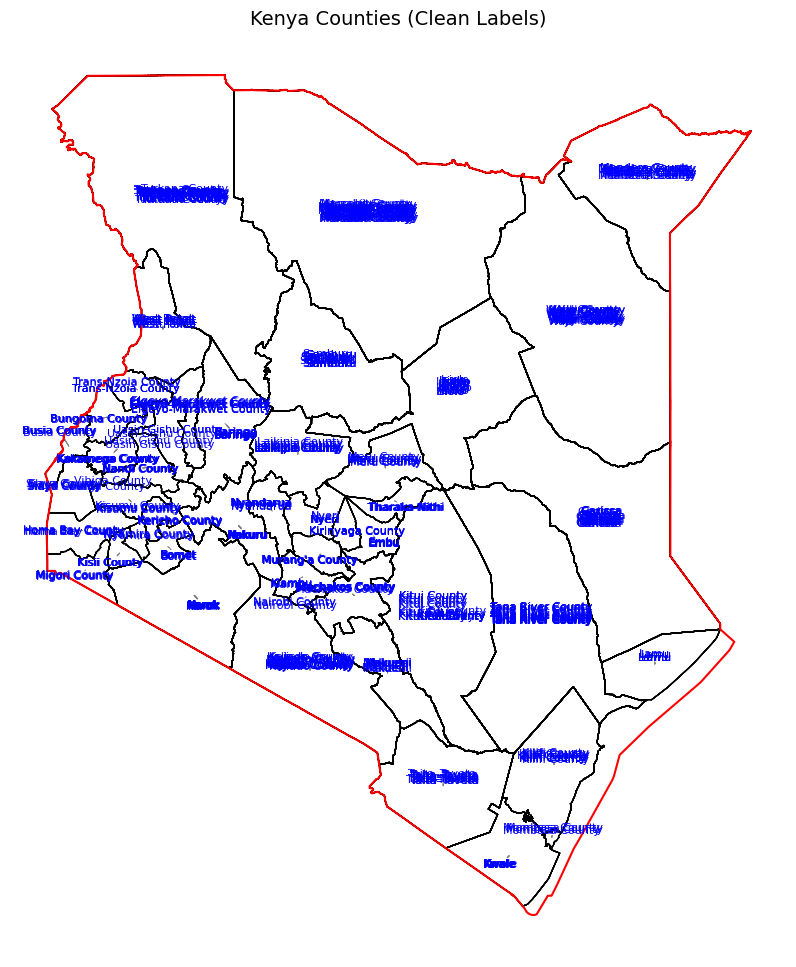

In [34]:
# keep only Kenyan counties
'''
1. Filter only Kenyan counties

Many Kenyan counties in OSM have an ISO3166-2 code like KE-xx.
So you can drop anything that doesn’t start with KE-.
'''
if "ISO3166-2" in gdf_counties.columns:
    gdf_counties = gdf_counties[gdf_counties["ISO3166-2"].str.startswith("KE-", na=False)]

# clean up labels

# Use name:en (English) if available, else fall back to name or official_name.

if "name:en" in gdf_counties.columns:
    gdf_counties["label"] = (
        gdf_counties["name:en"]
        .fillna(gdf_counties["name"])
        .fillna(gdf_counties["official_name"])
    )
else:
    gdf_counties["label"] = gdf_counties["name"]
#Plot with de-overlapped labels
import matplotlib.pyplot as plt
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(12, 12))
gdf_counties.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)
gdf_country.boundary.plot(ax=ax, color="red", linewidth=1.5)

texts = []
for _, row in gdf_counties.iterrows():
    if row.geometry.is_valid and row["label"]:
        x, y = row.geometry.centroid.coords[0]
        texts.append(ax.text(x, y, row["label"], fontsize=8, ha="center", color="blue"))

adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))
ax.set_title("Kenya Counties (Clean Labels)", fontsize=14)
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 291 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


KeyError: 'longitude'

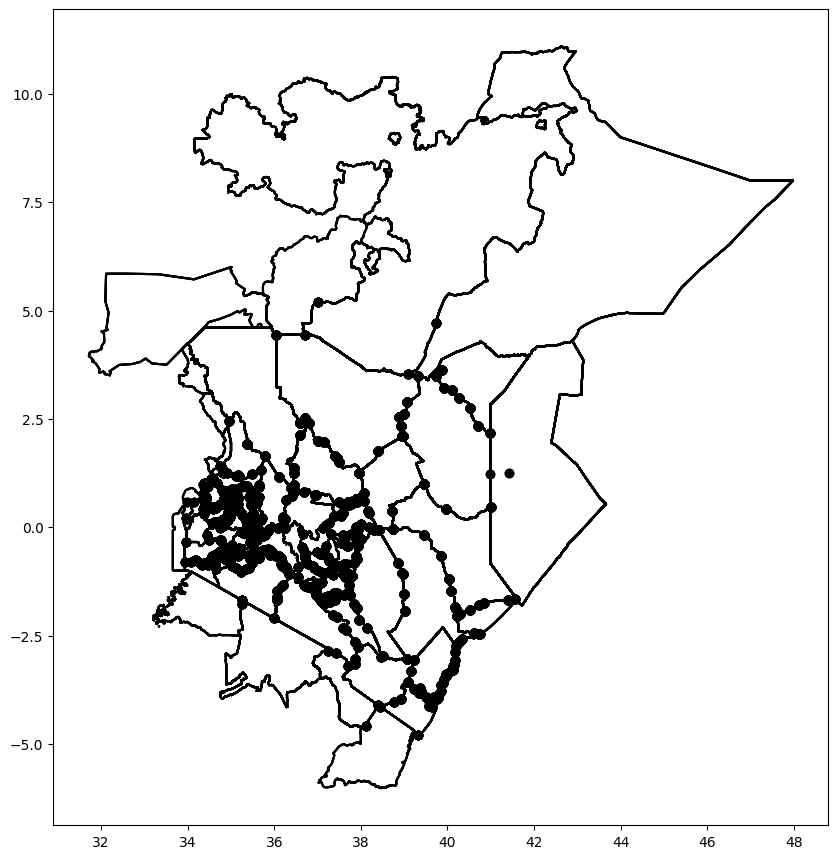

In [50]:
# texts
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV of counties
counties_csv = pd.read_csv("kenya_counties.csv")

# Load Kenya counties from OSMnx
gdf = ox.geocode_to_gdf("Kenya")  # national boundary
counties = ox.features_from_place("Kenya", {"admin_level": "4"})  # level 4 = counties


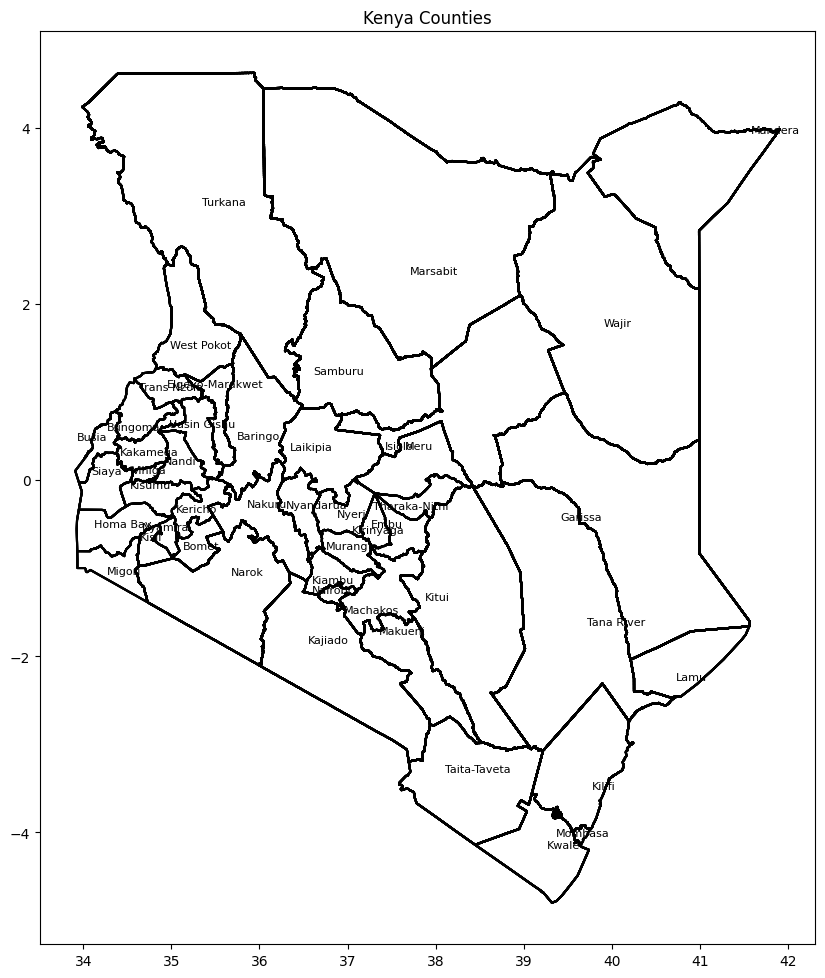

In [52]:
kenya_poly = gdf_country.iloc[0].geometry
counties = gpd.clip(gdf_counties, kenya_poly)
# Plot counties
fig, ax = plt.subplots(figsize=(10, 12))
counties.boundary.plot(ax=ax, color="black")

# Overlay centroid labels from CSV
for _, row in counties_csv.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["County"], fontsize=8, ha="center")

ax.set_title("Kenya Counties")
plt.show()


In [54]:
# Ensure county names are clean on both sides
counties["name"] = counties["name"].str.strip().str.title()

# Merge CSV with OSMnx data
counties_merged = counties.merge(counties_csv, left_on="name", right_on="County", how="left")

# Now counties_merged has both geometries + centroid info
#save counties merged.

<Axes: >

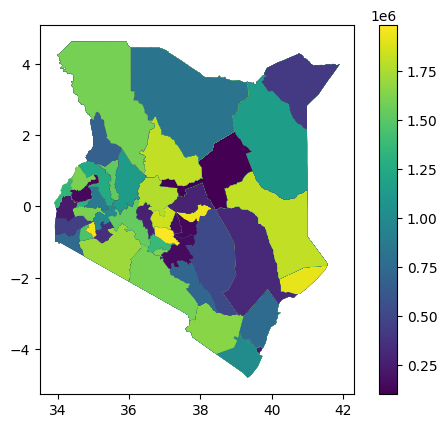

In [67]:
import numpy as np
# Add fake population column
np.random.seed(42)  # reproducible
counties_merged['population'] = np.random.randint(100_000, 2_000_000, size=len(counties_merged)) #(np.random.lognormal(mean=12, sigma=0.5, size=len(counties_merged)) / 1e3).astype(int) #
counties_merged.plot(column="population", legend=True)

In [64]:
clean_names = [set([i.get_text() for i in texts])]
#clean_texts = [i for i in texts if i.get]

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd

# get Kenya polygon
kenya = ox.geocode_to_gdf("Kenya").iloc[0].geometry

# get all administrative boundaries within Kenya
tags = {"boundary": "administrative"}
gdf_admin = ox.features_from_polygon(kenya, tags)

print("admin levels:", pd.Series(gdf_admin["admin_level"].unique()).dropna().tolist())

# plot country boundary (admin_level=2)
ax = gdf_admin[gdf_admin["admin_level"] == "3"].plot(
    figsize=(8, 8), edgecolor="red", facecolor="none"
)
ax.set_title("Kenya Boundary (admin_level=2)")
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 291 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


admin levels: ['2', '4', '5', '6', '3', '9', '10', '8', '7', '12', '1']


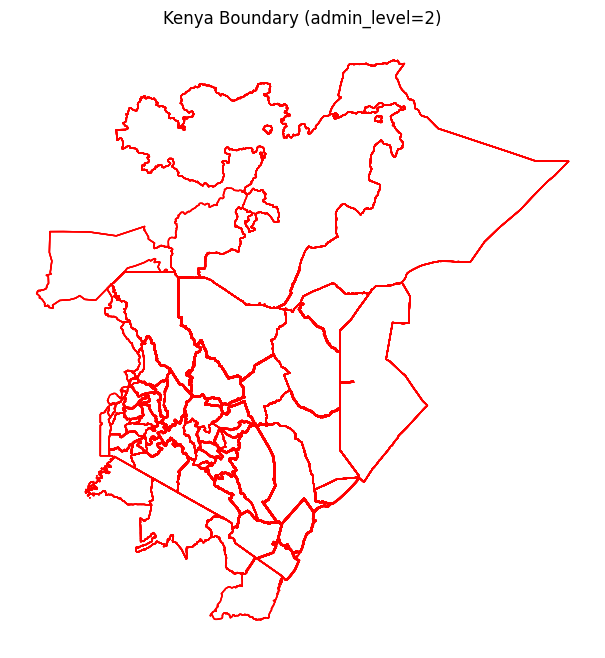

In [13]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd

# get Kenya polygon
kenya = ox.geocode_to_gdf("Kenya").iloc[0].geometry

# get all administrative boundaries within Kenya
tags = {"boundary": "administrative"}
gdf_admin = ox.features_from_polygon(kenya, tags)

print("admin levels:", pd.Series(gdf_admin["admin_level"].unique()).dropna().tolist())

# plot country boundary (admin_level=2)
ax = gdf_admin[gdf_admin["admin_level"] == "4"].plot(
    figsize=(8, 8), edgecolor="red", facecolor="none"
)
ax.set_title("Kenya Boundary (admin_level=2)")
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 291 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


admin levels: ['2', '4', '5', '6', '3', '9', '10', '8', '7', '12', '1']


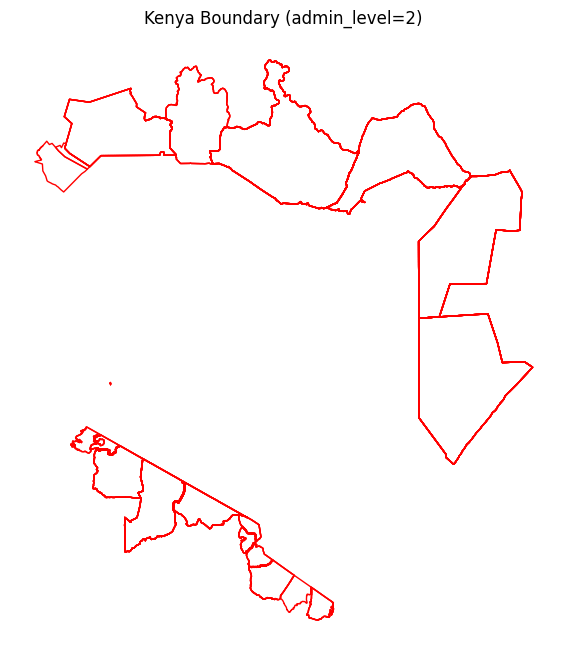

In [14]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd

# get Kenya polygon
kenya = ox.geocode_to_gdf("Kenya").iloc[0].geometry

# get all administrative boundaries within Kenya
tags = {"boundary": "administrative"}
gdf_admin = ox.features_from_polygon(kenya, tags)

print("admin levels:", pd.Series(gdf_admin["admin_level"].unique()).dropna().tolist())

# plot country boundary (admin_level=2)
ax = gdf_admin[gdf_admin["admin_level"] == "5"].plot(
    figsize=(8, 8), edgecolor="red", facecolor="none"
)
ax.set_title("Kenya Boundary (admin_level=2)")
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 291 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


admin levels: ['2', '4', '5', '6', '3', '9', '10', '8', '7', '12', '1']


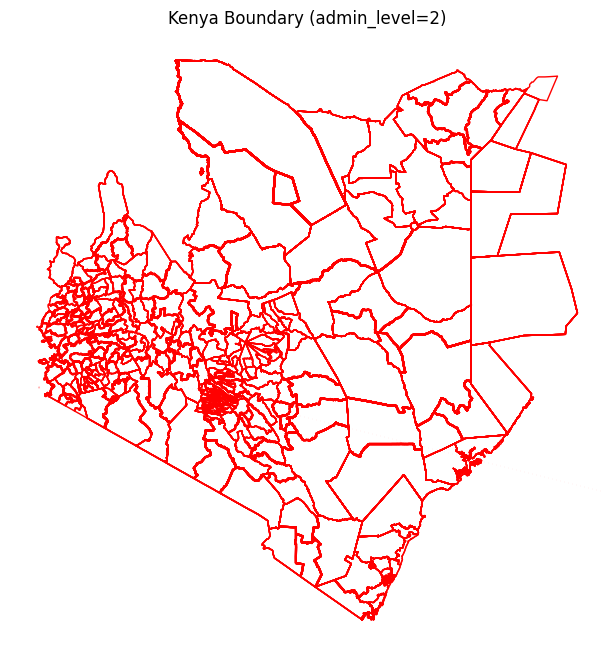

In [15]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd

# get Kenya polygon
kenya = ox.geocode_to_gdf("Kenya").iloc[0].geometry

# get all administrative boundaries within Kenya
tags = {"boundary": "administrative"}
gdf_admin = ox.features_from_polygon(kenya, tags)

print("admin levels:", pd.Series(gdf_admin["admin_level"].unique()).dropna().tolist())

# plot country boundary (admin_level=2)
ax = gdf_admin[gdf_admin["admin_level"] == "6"].plot(
    figsize=(8, 8), edgecolor="red", facecolor="none"
)
ax.set_title("Kenya Boundary (admin_level=2)")
ax.set_axis_off()
plt.show()


In [16]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd

# get Kenya polygon
kenya = ox.geocode_to_gdf("USA").iloc[0].geometry

# get all administrative boundaries within Kenya
tags = {"boundary": "administrative"}
gdf_admin = ox.features_from_polygon(kenya, tags)

print("admin levels:", pd.Series(gdf_admin["admin_level"].unique()).dropna().tolist())

# plot country boundary (admin_level=2)
ax = gdf_admin[gdf_admin["admin_level"] == "2"].plot(
    figsize=(8, 8), edgecolor="red", facecolor="none"
)
ax.set_title("Kenya Boundary (admin_level=2)")
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 126,958 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


KeyboardInterrupt: 